In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [11]:
# Load the Iris dataset
iris = load_iris()
X = iris.data       # 4-dimensional features
y = iris.target     # True labels (for visualization only)
target_names = iris.target_names

# Create a DataFrame with feature columns and target labels
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

# Display the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


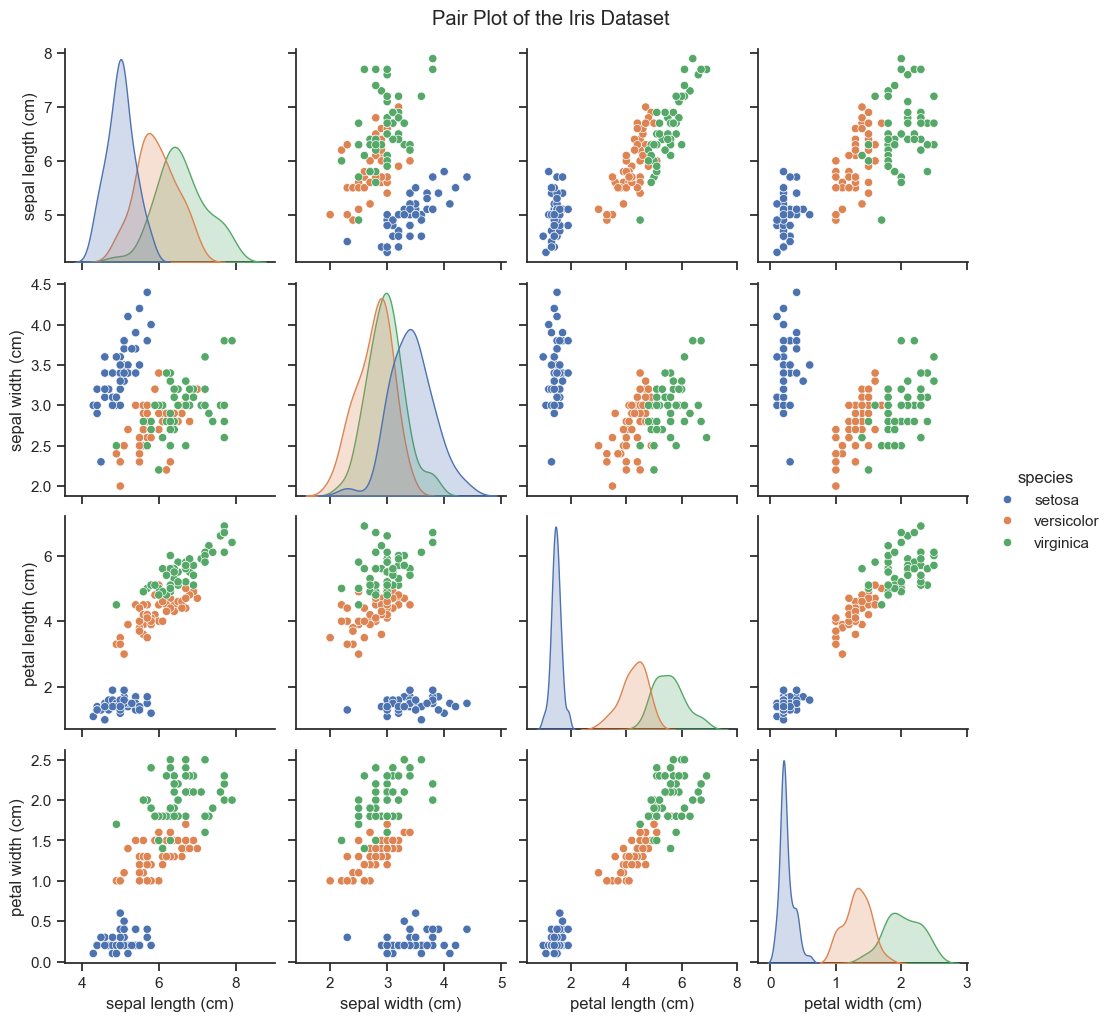

In [12]:
# Set Seaborn style for plots
sns.set(style="ticks", color_codes=True)

# Create a pair plot: displays scatter plots for each pair of features and KDE on the diagonal
pair_plot = sns.pairplot(df,
                         vars=iris.feature_names,
                         hue="species",
                         diag_kind="kde",
                         height=2.5)

plt.suptitle("Pair Plot of the Iris Dataset", y=1.02)
plt.show()

In [17]:
# Create a DataFrame containing only the numeric features (species info removed)
df_features = pd.DataFrame(X, columns=iris.feature_names)
df_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


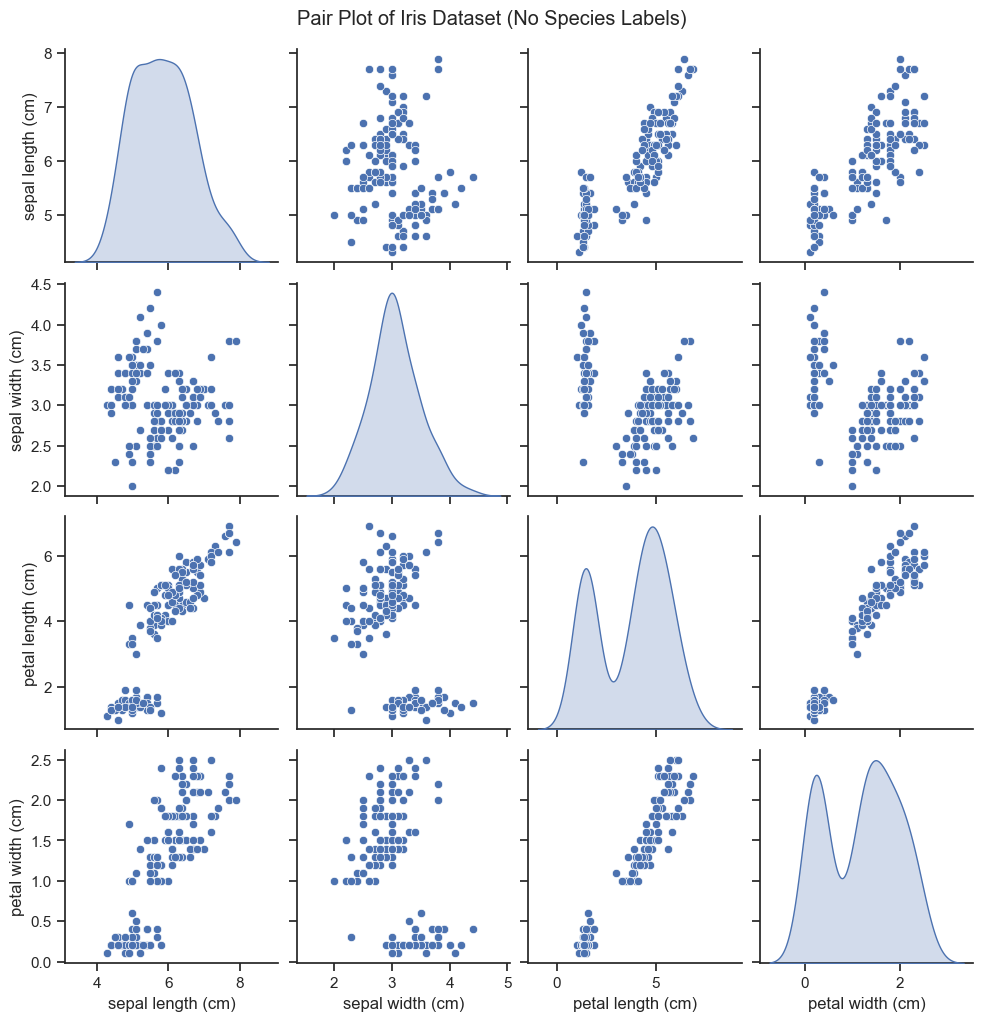

In [18]:
# Create a pair plot without using hue (i.e., without differentiating species by color)
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df_features, diag_kind="kde", height=2.5)

plt.suptitle("Pair Plot of Iris Dataset (No Species Labels)", y=1.02)
plt.show()

In [19]:
from sklearn.cluster import KMeans

# Initialize KMeans with 3 clusters (since Iris naturally has 3 groups)
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict cluster labels on the features-only DataFrame
clusters = kmeans.fit_predict(df_features)

# Add the resulting cluster labels to the DataFrame
df_features['cluster'] = clusters

# Display the first few rows with the new 'cluster' column
df_features.head()

c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


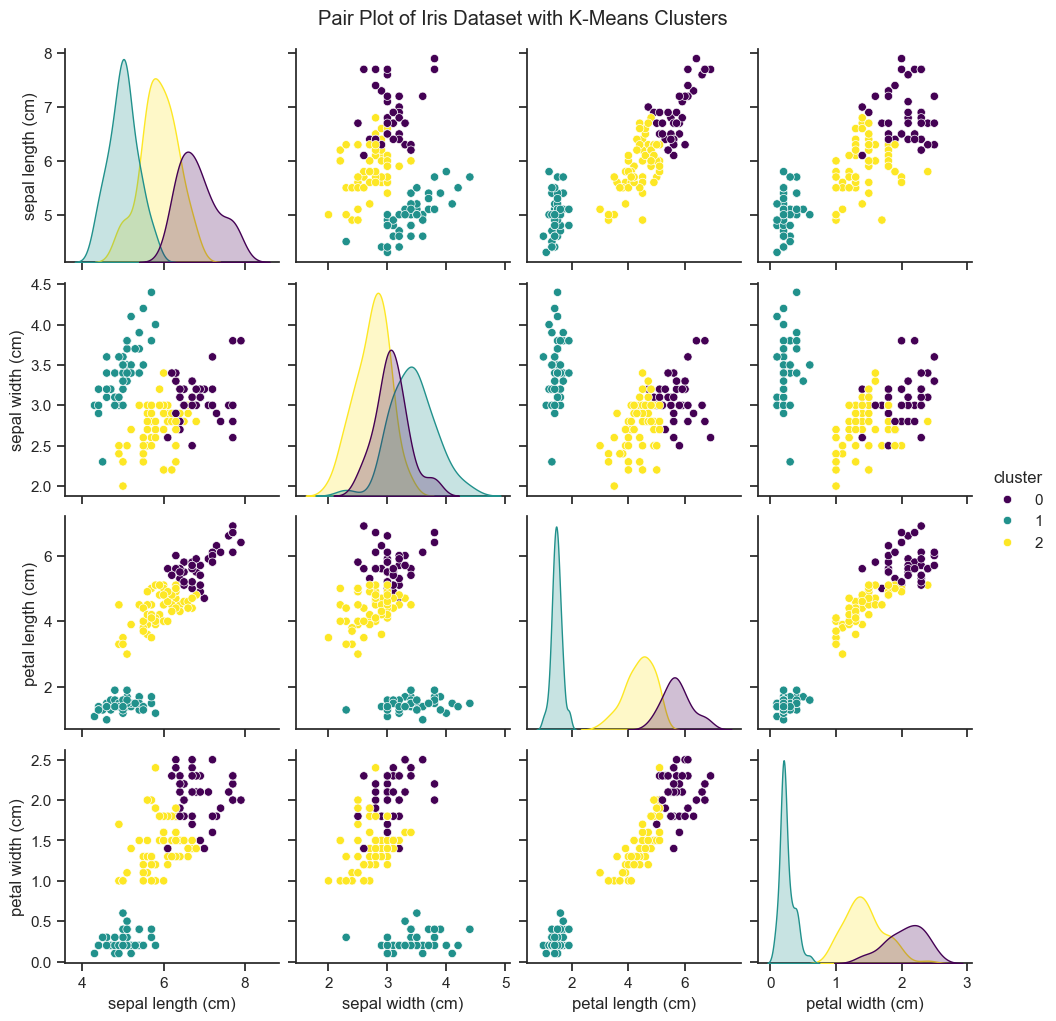

In [21]:
# Set Seaborn style for the plots
sns.set(style="ticks", color_codes=True)

# Create a pair plot using the numeric features and color by the K-Means clusters
pair_plot_cluster = sns.pairplot(df_features,
                                 vars=iris.feature_names,
                                 hue='cluster',
                                 diag_kind="kde",
                                 palette="viridis",
                                 height=2.5)

plt.suptitle("Pair Plot of Iris Dataset with K-Means Clusters", y=1.02)
plt.show()

In [25]:
# Create a confusion matrix between the original species (iris.target) and the cluster labels
conf_matrix = pd.crosstab(iris.target, df_features['cluster'], rownames=['Species'], colnames=['Cluster'])
print("Confusion Matrix:")
print(conf_matrix)

# For each cluster, determine the majority species (i.e., the species with the highest count)
cluster_to_species = {}
for cluster in conf_matrix.columns:
    cluster_to_species[cluster] = conf_matrix[cluster].idxmax()

print("\nCluster to Species Mapping (Majority Vote):")
print(cluster_to_species)

# Map each cluster label to the corresponding predicted species using the derived mapping
predicted_species = df_features['cluster'].map(cluster_to_species)

# Compute accuracy: compare the mapped (predicted) species to the original species in the iris dataset
accuracy = np.mean(predicted_species == iris.target)
print(f"\nClustering Accuracy: {accuracy:.3f}")

Confusion Matrix:
Cluster   0   1   2
Species            
0         0  50   0
1         3   0  47
2        36   0  14

Cluster to Species Mapping (Majority Vote):
{0: 2, 1: 0, 2: 1}

Clustering Accuracy: 0.887


c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

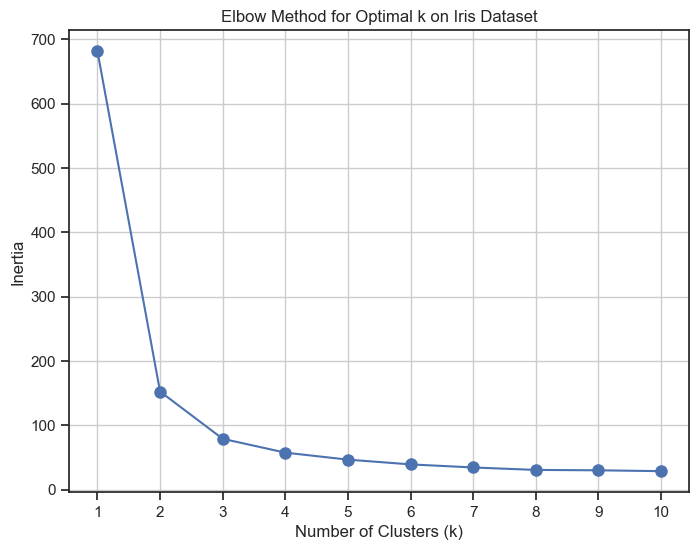

In [27]:
# Create a DataFrame with only the numeric features (if not already available)
# If df_features exists but contains a 'cluster' column, drop it for this analysis.
if 'cluster' in df_features.columns:
    df_cluster = df_features.drop('cluster', axis=1)
else:
    df_cluster = df_features.copy()

# Calculate inertia (sum of squared distances) for different k values.
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve.
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, 'bo-', markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k on Iris Dataset")
plt.xticks(k_range)
plt.grid(True)
plt.show()

c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k = 2, the silhouette score is 0.6810
For k = 3, the silhouette score is 0.5512
For k = 4, the silhouette score is 0.4976


c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k = 5, the silhouette score is 0.4931
For k = 6, the silhouette score is 0.3678
For k = 7, the silhouette score is 0.3543


c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\apro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k = 8, the silhouette score is 0.3447
For k = 9, the silhouette score is 0.3156
For k = 10, the silhouette score is 0.3014


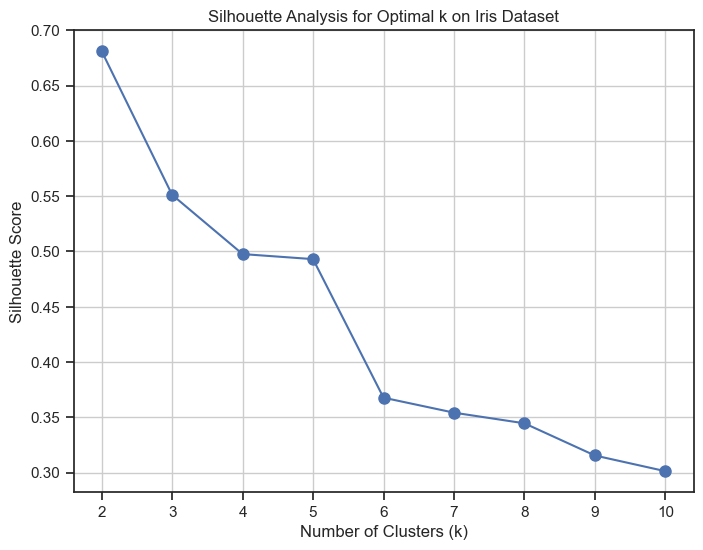

In [28]:
from sklearn.metrics import silhouette_score

# We'll work with df_cluster, which contains only numeric features.
# Silhouette score is defined for k >= 2.
silhouette_scores = []
k_range = range(2, 11)  # Compute for k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_cluster)
    score = silhouette_score(df_cluster, cluster_labels)
    silhouette_scores.append(score)
    print(f"For k = {k}, the silhouette score is {score:.4f}")

# Plot the silhouette scores vs. number of clusters
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k on Iris Dataset")
plt.xticks(list(k_range))
plt.grid(True)
plt.show()